In [1]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv("data.csv",index_col="date",parse_dates=True)

In [18]:
data.head()

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [22]:
data.tail()

,price
date,
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674
2018-01-01,1332.809
2018-02-01,1333.775


<Axes: xlabel='date'>

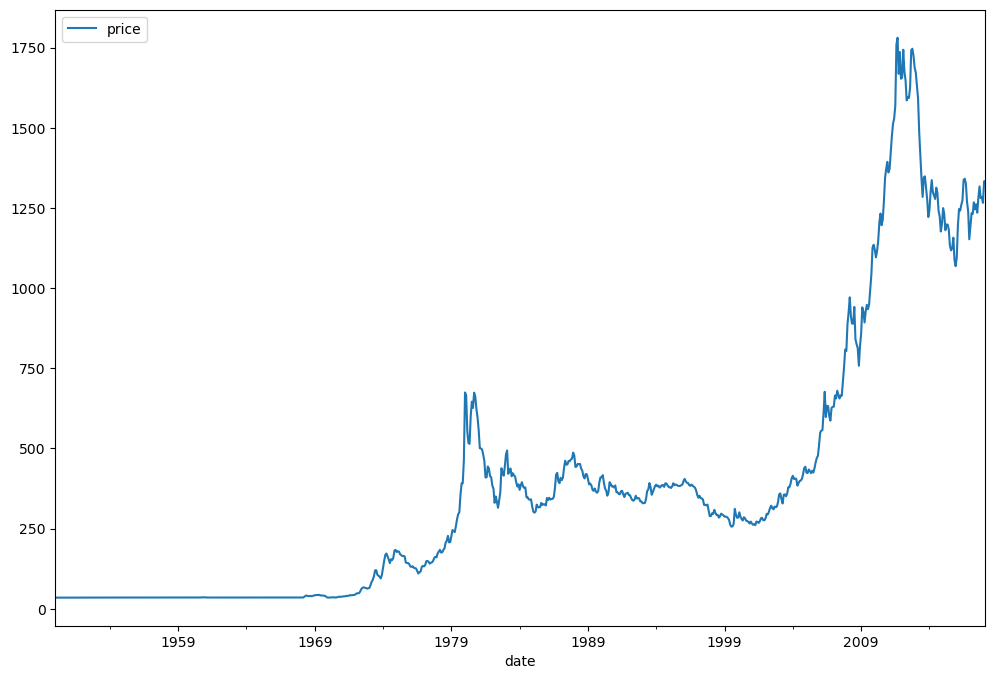

In [26]:
data.plot(figsize = (12,8))

In [28]:
start_date = '2009-01-01'
end_date = '2018-01-01'
mask = (data.index >= start_date) & (data.index < end_date)
data = data.loc[mask]

In [30]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

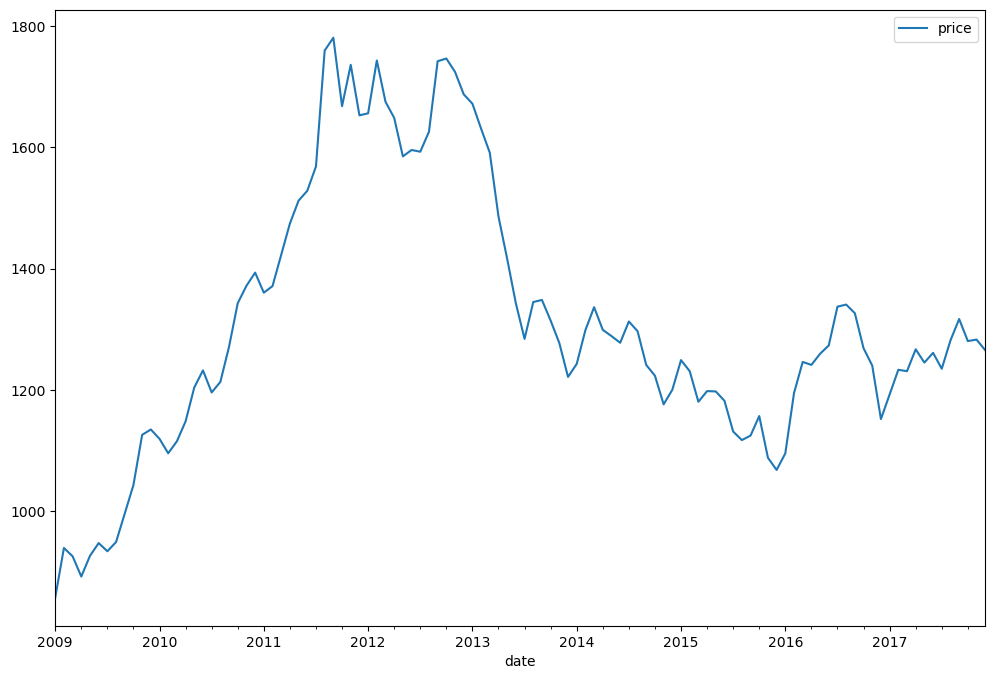

In [38]:
data.index.freq = "MS"
data.plot(figsize=(12,8))

In [40]:
datayearly = data.rolling(window=12).mean()

<Axes: title={'center': 'Yearly Avg. Gold Prices'}, xlabel='date'>

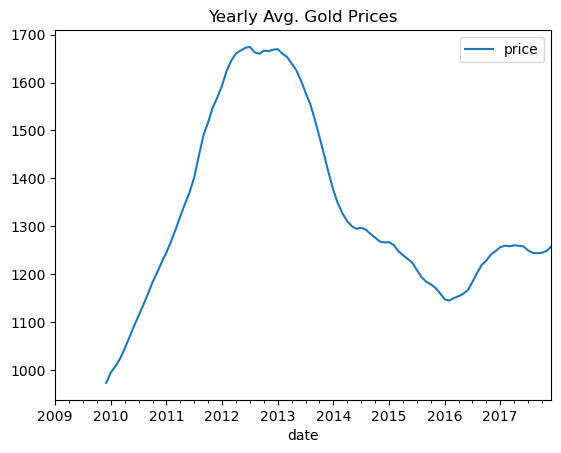

In [42]:
datayearly.plot(title="Yearly Avg. Gold Prices")

In [68]:
# ML
## Dickey Fuller test

from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series,autolag='AIC')
    labels = ["ADF Test Statistic","p value","#lags used","# observations"]
    out = pd.Series(result[0:4],index=labels)
    print(out.to_string())
    if result [1] <= 0.05:
      print("Reject the null hypothesis")
      print("Data has no unit root and stationary")
    else:
      print("Fail to reject the null hypothesis")
      print("Data has a unit root and non-stationary")

In [70]:
adf_test(data['price'])

ADF Test Statistic     -2.133761
p value                 0.231158
#lags used              5.000000
# observations        102.000000
Fail to reject the null hypothesis
Data has a unit root and non-stationary


In [72]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ------- -------------------------------- 112.6/614.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/614.7 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------- ------------------------------- 0.6/2.8 MB 12.2 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 13.6 MB/s eta 0:00:01
   ------------------------------- -------- 2.2/2.8 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 16.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
from pmdarima import auto_arima
arima_fit = auto_arima(data['price'],start_P = 0, start_Q = 0, max_P = 10, max_Q = 10, seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1861.677, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1150.780, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1152.045, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1148.396, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1152.930, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1149.835, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1473.891, Time=0.01 sec
 ARIMA(

In [76]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data['price'], order = (1,0,1))

In [78]:
modelresults = model.fit()

In [86]:
fcast = modelresults.predict(start = len(data), end = len(data) + 24, typ=('levels'))
fcast = fcast.rename('ARIMA 1,0,1 Forecast')

D:\Python2024\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='date'>

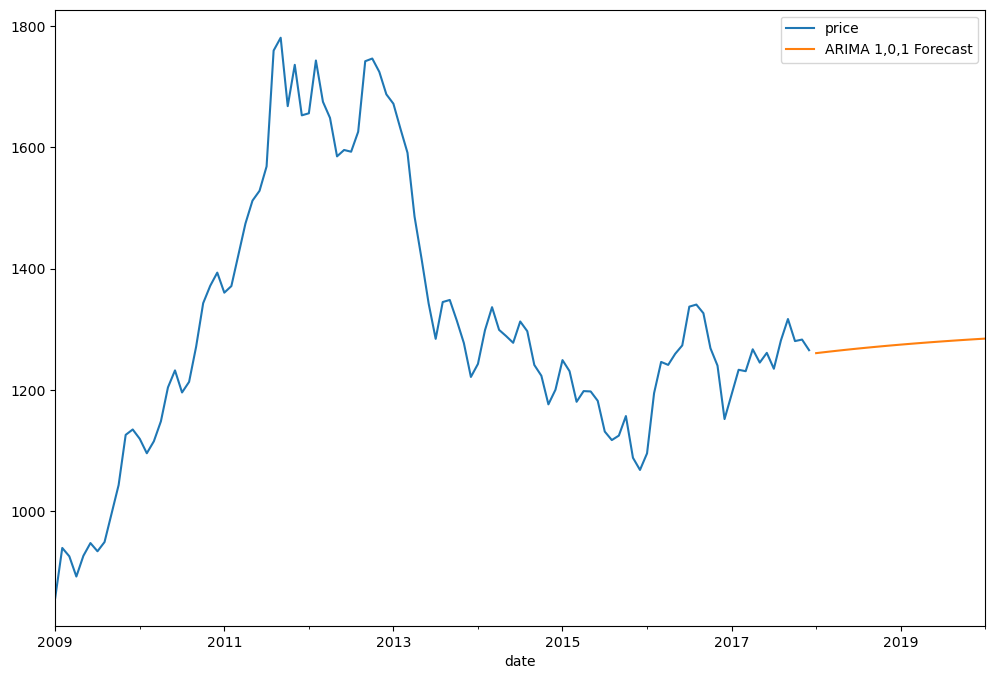

In [90]:
data['price'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)